In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.patches as mpatches

In [4]:
def resident(x, t):
    lamda = (beta1*(x[1]+2*x[2]))
    sdot = rho - mu*x[0] - sigmaS*lamda*x[0]
    i1dot = sigmaS*lamda*x[0] - (mu+alpha1+(sigmaI*lamda))*x[1]
    d11dot = sigmaI*lamda*x[1] - (mu+alpha11)*x[2]
    return sdot,i1dot,d11dot

In [5]:
mu = 0.02
rho = 0.02
sigmaS = 1
sigmaI = 5

beta1=0.75
alpha1 = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(beta1 - 0.75)/0.157))
alpha11 = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*((2*beta1) - 0.75)/0.157))

In [6]:
tmax2 = 2000
ts2 = np.linspace(0,200,tmax2)

In [7]:
x0 = [0.8,0.5,0.05]
xs = odeint(resident,x0,ts2)
Ss = xs[:,0]
I1s = xs[:,1]
D11s = xs[:,2]

S=Ss[1999]
I1=I1s[1999]
D11=D11s[1999]

In [8]:
def fitnessgrad():
    lambda1=(betam*(I1+(2*D11)))
    alpham = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(betam - 0.75)/0.157))
    alphamd = 0.157*np.exp(0.2*(betam - 0.75)/0.157)
    alpha1m = 0.1 - 0.157**2/0.2*(1 - np.exp(0.4*(betam - 0.75)/0.157))
    alpha1md = 0.314*np.exp(0.4*(betam - 0.75)/0.157)
    dr = sigmaS*S*(((2*sigmaI*lambda1)/(mu+alpham+(sigmaI*lambda1)))*(((mu+alpha1m-(betam*alpha1md))/((mu+alpha1m)**2))-(((betam*alphamd)/(mu+alpha1m))/(mu+alpham+(sigmaI*lambda1))))) + sigmaS*S*((mu+alpham+(sigmaI*lambda1)-(betam*alphamd))/((mu+alpham+(sigmaI*lambda1))**2)) + 2*sigmaI*I1*((mu+alpha1m-(betam*alpha1md))/((mu+alpha1m)**2))
    return dr

# $\mu$

In [47]:
muvals = np.around(np.arange(start=0, stop=0.051, step=0.001),decimals=3)
betamvals = np.around(np.arange(start=0, stop=1.0001, step=0.0001),decimals=4)
singstratmu=[]

In [48]:
for i in muvals:
    mu = i 
    for j in betamvals:
        betam = j 
                
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[1999]
        I1=I1s[1999]
        D11=D11s[1999]
        
        dr = fitnessgrad()
        if dr < 0:
            sings = (j + (j-0.0001))/2
            print("mu =",mu,"beta =",sings)
            singstratmu.append(sings)
            break

mu = 0.0 beta = -5e-05
mu = 0.001 beta = -5e-05
mu = 0.002 beta = -5e-05
mu = 0.003 beta = -5e-05
mu = 0.004 beta = -5e-05
mu = 0.005 beta = -5e-05
mu = 0.006 beta = 0.11245
mu = 0.007 beta = 0.15425
mu = 0.008 beta = 0.18465
mu = 0.009 beta = 0.20915
mu = 0.01 beta = 0.22995000000000002
mu = 0.011 beta = 0.24825
mu = 0.012 beta = 0.26465
mu = 0.013 beta = 0.27945000000000003
mu = 0.014 beta = 0.29315
mu = 0.015 beta = 0.30575
mu = 0.016 beta = 0.31755
mu = 0.017 beta = 0.32865
mu = 0.018 beta = 0.33915
mu = 0.019 beta = 0.34905
mu = 0.02 beta = 0.35845
mu = 0.021 beta = 0.36745
mu = 0.022 beta = 0.37605
mu = 0.023 beta = 0.38435
mu = 0.024 beta = 0.39225
mu = 0.025 beta = 0.39995
mu = 0.026 beta = 0.40735
mu = 0.027 beta = 0.41445
mu = 0.028 beta = 0.42145
mu = 0.029 beta = 0.42815000000000003
mu = 0.03 beta = 0.43465
mu = 0.031 beta = 0.44105
mu = 0.032 beta = 0.44715
mu = 0.033 beta = 0.45325
mu = 0.034 beta = 0.45915
mu = 0.035 beta = 0.46485
mu = 0.036 beta = 0.47045
mu = 0.037 be

(0.0, 0.8)

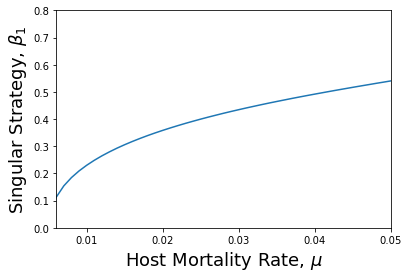

In [49]:
positions = (0.01, 0.02, 0.03, 0.04, 0.05)
plt.xticks(positions)
plt.plot(muvals,singstratmu)
plt.xlabel(r'Host Mortality Rate, $\mu$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0.006,0.05) # in  maple first value of mu used is 0.005. limiting x-axis to this range
plt.ylim(0,0.8) 

# $\rho$

In [10]:
mu=0.02
rhovals = np.around(np.arange(start=0.00000000000000000000000000000000000000000000000001, stop=0.051, step=0.001),decimals=3)
betamvals = np.around(np.arange(start=0, stop=1.001, step=0.001),decimals=3)
singstratrho=[]

In [11]:
for i in rhovals:
    rho = i
    for j in betamvals:
        betam = j 
                
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[1999]
        I1=I1s[1999]
        D11=D11s[1999]
    
        dr = fitnessgrad()
        if dr < 0:
            sings = (j + (j-0.001))/2
            print("rho =",rho,"beta =",sings)
            singstratrho.append(sings)
            break

rho = 0.0 beta = 0.7645
rho = 0.001 beta = 0.7645
rho = 0.002 beta = 0.7645
rho = 0.003 beta = 0.7635000000000001
rho = 0.004 beta = 0.6154999999999999
rho = 0.005 beta = 0.3855
rho = 0.006 beta = 0.3835
rho = 0.007 beta = 0.3685
rho = 0.008 beta = 0.3645
rho = 0.009 beta = 0.3625
rho = 0.01 beta = 0.3605
rho = 0.011 beta = 0.3595
rho = 0.012 beta = 0.3595
rho = 0.013 beta = 0.3585
rho = 0.014 beta = 0.3585
rho = 0.015 beta = 0.3585
rho = 0.016 beta = 0.3585
rho = 0.017 beta = 0.3585
rho = 0.018 beta = 0.3585
rho = 0.019 beta = 0.3585
rho = 0.02 beta = 0.3585
rho = 0.021 beta = 0.3585
rho = 0.022 beta = 0.3585
rho = 0.023 beta = 0.3585
rho = 0.024 beta = 0.3585
rho = 0.025 beta = 0.3595
rho = 0.026 beta = 0.3595
rho = 0.027 beta = 0.3595
rho = 0.028 beta = 0.3595
rho = 0.029 beta = 0.3595
rho = 0.03 beta = 0.3595
rho = 0.031 beta = 0.3595
rho = 0.032 beta = 0.3595
rho = 0.033 beta = 0.3595
rho = 0.034 beta = 0.3595
rho = 0.035 beta = 0.3605
rho = 0.036 beta = 0.3605
rho = 0.037 beta = 

(0.0, 0.8)

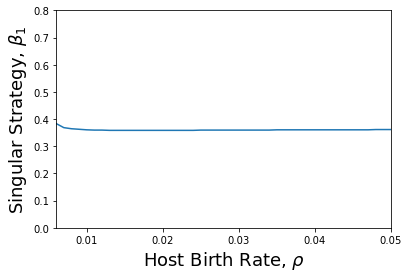

In [12]:
positions = (0.01,0.02,0.03,0.04,0.05)
plt.xticks(positions)
plt.plot(rhovals,singstratrho)
plt.xlabel(r'Host Birth Rate, $\rho$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0.006,0.05)
plt.ylim(0,0.8) 

In [39]:
# specify the location of (left,bottom),width,height
rect=mpatches.Rectangle((0.033,0.32),0.003,0.08, 
                        fill = False,
                        color = "red",
                        linewidth = 2)

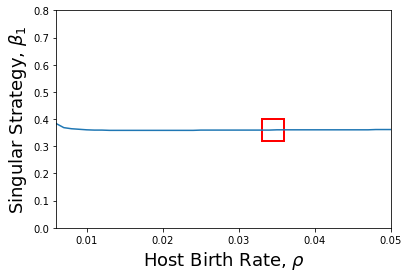

In [40]:
positions = (0.01,0.02,0.03,0.04,0.05)
plt.xticks(positions)
plt.plot(rhovals,singstratrho)
plt.xlabel(r'Host Birth Rate, $\rho$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0.006,0.05)
plt.ylim(0,0.8) 
plt.gca().add_patch(rect)

(0.3575, 0.3625)

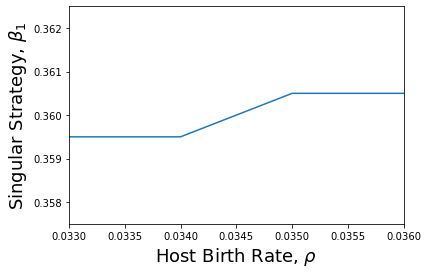

In [41]:
#positions = (0.01,0.02,0.03,0.04,0.05)
#plt.xticks(positions)
plt.plot(rhovals,singstratrho)
plt.xlabel(r'Host Birth Rate, $\rho$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0.033,0.036)
plt.ylim(0.3575,0.3625) 

# $\sigma_S$

In [53]:
rho=0.02
sigmaSvals = np.around(np.arange(start=0, stop=10.1, step=0.1),decimals=1)
betamvals = np.around(np.arange(start=0, stop=1.001, step=0.001),decimals=3)
singstratss=[]

In [54]:
for i in sigmaSvals:
    sigmaS = i
    for j in betamvals:
        betam = j 
                
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[1999]
        I1=I1s[1999]
        D11=D11s[1999]
        
        dr = fitnessgrad()
        if dr < 0:
            sings = (j + (j-0.001))/2
            print("sigmaS =",sigmaS,"beta =",sings)
            singstratss.append(sings)
            break

sigmaS = 0.0 beta = 0.3645
sigmaS = 0.1 beta = 0.7645
sigmaS = 0.2 beta = 0.3885
sigmaS = 0.3 beta = 0.3595
sigmaS = 0.4 beta = 0.3585
sigmaS = 0.5 beta = 0.3585
sigmaS = 0.6 beta = 0.3585
sigmaS = 0.7 beta = 0.3585
sigmaS = 0.8 beta = 0.3585
sigmaS = 0.9 beta = 0.3585
sigmaS = 1.0 beta = 0.3585
sigmaS = 1.1 beta = 0.3585
sigmaS = 1.2 beta = 0.3585
sigmaS = 1.3 beta = 0.3585
sigmaS = 1.4 beta = 0.3585
sigmaS = 1.5 beta = 0.3585
sigmaS = 1.6 beta = 0.3585
sigmaS = 1.7 beta = 0.3585
sigmaS = 1.8 beta = 0.3585
sigmaS = 1.9 beta = 0.3585
sigmaS = 2.0 beta = 0.3585
sigmaS = 2.1 beta = 0.3585
sigmaS = 2.2 beta = 0.3585
sigmaS = 2.3 beta = 0.3585
sigmaS = 2.4 beta = 0.3585
sigmaS = 2.5 beta = 0.3585
sigmaS = 2.6 beta = 0.3585
sigmaS = 2.7 beta = 0.3585
sigmaS = 2.8 beta = 0.3585
sigmaS = 2.9 beta = 0.3585
sigmaS = 3.0 beta = 0.3585
sigmaS = 3.1 beta = 0.3585
sigmaS = 3.2 beta = 0.3585
sigmaS = 3.3 beta = 0.3585
sigmaS = 3.4 beta = 0.3585
sigmaS = 3.5 beta = 0.3585
sigmaS = 3.6 beta = 0.3585
s

(0.0, 0.8)

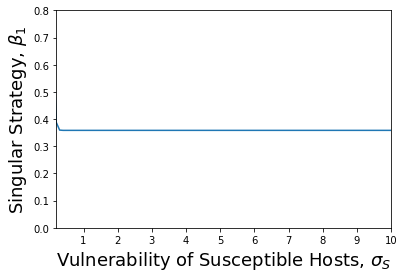

In [62]:
positions = (1,2,3,4,5,6,7,8,9,10)
plt.xticks(positions)
plt.plot(sigmaSvals,singstratss)
plt.xlabel(r'Vulnerability of Susceptible Hosts, $\sigma_S$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0.2,10)
plt.ylim(0,0.8)

# $\sigma_I$

In [56]:
sigmaS=1
sigmaIvals = np.around(np.arange(start=0, stop=10.1, step=0.1),decimals=1)
betamvals = np.around(np.arange(start=0, stop=1.001, step=0.001),decimals=3)
singstratsi=[]

In [57]:
for i in sigmaIvals:
    sigmaI = i
    for j in betamvals:
        betam = j 
        
        x0 = [0.8,0.5,0.05]
        xs = odeint(resident,x0,ts2)
        Ss = xs[:,0]
        I1s = xs[:,1]
        D11s = xs[:,2]

        S=Ss[1999]
        I1=I1s[1999]
        D11=D11s[1999]
        
        dr = fitnessgrad()
        if dr < 0:
            sings = (j + (j-0.001))/2
            print("sigmaI =",sigmaI,"beta =",sings)
            singstratsi.append(sings)
            break

sigmaI = 0.0 beta = 0.7645
sigmaI = 0.1 beta = 0.5425
sigmaI = 0.2 beta = 0.4635
sigmaI = 0.3 beta = 0.4275
sigmaI = 0.4 beta = 0.4075
sigmaI = 0.5 beta = 0.3955
sigmaI = 0.6 beta = 0.3875
sigmaI = 0.7 beta = 0.3815
sigmaI = 0.8 beta = 0.3765
sigmaI = 0.9 beta = 0.3735
sigmaI = 1.0 beta = 0.3705
sigmaI = 1.1 beta = 0.3685
sigmaI = 1.2 beta = 0.3665
sigmaI = 1.3 beta = 0.3655
sigmaI = 1.4 beta = 0.3645
sigmaI = 1.5 beta = 0.3635
sigmaI = 1.6 beta = 0.3625
sigmaI = 1.7 beta = 0.3615
sigmaI = 1.8 beta = 0.3615
sigmaI = 1.9 beta = 0.3605
sigmaI = 2.0 beta = 0.3605
sigmaI = 2.1 beta = 0.3605
sigmaI = 2.2 beta = 0.3595
sigmaI = 2.3 beta = 0.3595
sigmaI = 2.4 beta = 0.3595
sigmaI = 2.5 beta = 0.3595
sigmaI = 2.6 beta = 0.3585
sigmaI = 2.7 beta = 0.3585
sigmaI = 2.8 beta = 0.3585
sigmaI = 2.9 beta = 0.3585
sigmaI = 3.0 beta = 0.3585
sigmaI = 3.1 beta = 0.3585
sigmaI = 3.2 beta = 0.3585
sigmaI = 3.3 beta = 0.3585
sigmaI = 3.4 beta = 0.3585
sigmaI = 3.5 beta = 0.3585
sigmaI = 3.6 beta = 0.3585
s

(0.0, 0.8)

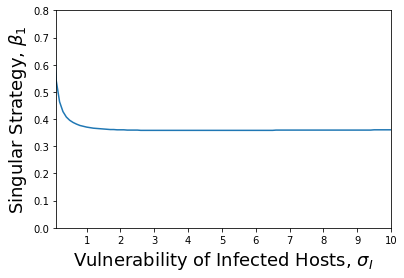

In [63]:
positions = (1,2,3,4,5,6,7,8,9,10)
plt.xticks(positions)
plt.plot(sigmaIvals,singstratsi)
plt.xlabel(r'Vulnerability of Infected Hosts, $\sigma_I$',fontsize=18)
plt.ylabel(r'Singular Strategy, $\beta_1$',fontsize=18)
plt.xlim(0.1,10)
plt.ylim(0,0.8)